#Mini-Project #1 - Deep Learning

##Antonin GAY - MVA 2018-19

### 3. Simple classification

In a first time, we will use the given functions to train a model on retrieving drawings' shape inside of figures. For that, we have three functions which create drawings : triangles, disks and rectangles.

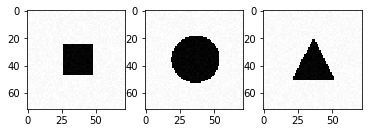

In [2]:
# Code de génération de formes
%matplotlib inline
from mp1_figures import *

im_rect = generate_a_rectangle(10)
width = int(np.sqrt(im_rect.shape[0]))

plt.subplot(131); plt.imshow(im_rect.reshape(width, width), cmap='gray')
im_disk = generate_a_disk(10); plt.subplot(132); plt.imshow(im_disk.reshape(width, width), cmap='gray')
im_tri = generate_a_triangle(10)[0]; plt.subplot(133); plt.imshow(im_tri.reshape(width, width), cmap='gray')
plt.show()


We will then use them to create a dataset of 300 figures, each one containing a drawing, associated with a value y, depending on the form it contains : y=0 if it's a rectangle, y=1 if a disk and y=2 if a triangle.

In [3]:
from mp1_dataset import *

[X_train, Y_train] = generate_dataset_classification(300, noise=20)


Creating dataset:   0%|          | 0/300 [00:00<?, ?it/s]

Creating dataset:   4%|▎         | 11/300 [00:00<00:02, 101.19it/s]

Creating dataset:   7%|▋         | 22/300 [00:00<00:02, 101.19it/s]

Creating dataset:   9%|▉         | 28/300 [00:00<00:03, 82.62it/s] 

Creating dataset:  13%|█▎        | 38/300 [00:00<00:03, 87.00it/s]

Creating dataset:  16%|█▋        | 49/300 [00:00<00:02, 90.59it/s]

Creating dataset:  19%|█▉        | 58/300 [00:00<00:02, 88.88it/s]

Creating dataset:  22%|██▏       | 66/300 [00:00<00:03, 77.15it/s]

Creating dataset:  25%|██▌       | 76/300 [00:00<00:02, 82.68it/s]

Creating dataset:  29%|██▊       | 86/300 [00:00<00:02, 87.04it/s]

Creating dataset:  32%|███▏      | 96/300 [00:01<00:02, 89.42it/s]

Creating dataset:  36%|███▌      | 107/300 [00:01<00:02, 92.88it/s]

Creating dataset:  39%|███▉      | 117/300 [00:01<00:02, 81.34it/s]

Creating dataset:  42%|████▏     | 127/300 [00:01<00:02, 86.00it/s]

Creating dataset:  46%|████▌     | 137/300 [00:01<00:01, 88.88it/s]

Creating dataset:  49%|████▉     | 147/300 [00:01<00:01, 90.28it/s]

Creating dataset:  52%|█████▏    | 157/300 [00:01<00:01, 92.80it/s]

Creating dataset:  56%|█████▌    | 167/300 [00:01<00:01, 77.89it/s]

Creating dataset:  59%|█████▉    | 177/300 [00:02<00:01, 83.06it/s]

Creating dataset:  62%|██████▏   | 187/300 [00:02<00:01, 87.34it/s]

Creating dataset:  66%|██████▌   | 198/300 [00:02<00:01, 91.08it/s]

Creating dataset:  69%|██████▉   | 208/300 [00:02<00:00, 92.87it/s]

Creating dataset:  73%|███████▎  | 218/300 [00:02<00:00, 94.71it/s]

Creating dataset:  76%|███████▋  | 229/300 [00:02<00:00, 96.56it/s]

Creating dataset:  80%|███████▉  | 239/300 [00:02<00:00, 70.77it/s]

Creating dataset:  83%|████████▎ | 250/300 [00:02<00:00, 78.28it/s]

Creating dataset:  87%|████████▋ | 261/300 [00:02<00:00, 84.18it/s]

Creating dataset:  90%|█████████ | 271/300 [00:03<00:00, 87.74it/s]

Creating dataset:  94%|█████████▍| 282/300 [00:03<00:00, 91.60it/s]

Creating dataset:  98%|█████████▊| 293/300 [00:03<00:00, 95.01it/s]

Creating dataset: 100%|██████████| 300/300 [00:03<00:00, 88.65it/s]

Finally, we will create and train some two linear models on this data set: one using stochastic gradient descent optimizer, the other using Adam optimizer. Thus, well be abble to compare, on this example, the two optimizers.

Those models will take as inputs the images with reduces resolution, like it was done on the example with the written number reconizing given in class. This allow a limited number of inputs, which makes the convergence easier in our case with 300 training data.

****** SGD optimizer ******

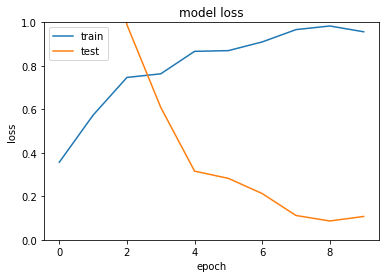

****** Adam optimizer ******

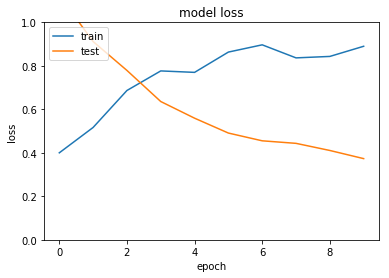

Prediction with sgd: rect: [[1. 0. 0.]] | disk: [[0. 1. 0.]] | triangle: [[0. 0. 1.]]

Prediction with Adam: rect: [[6.511077e-37 1.000000e+00 0.000000e+00]] | disk: [[0. 1. 0.]] | triangle: [[0. 0. 1.]]

In [4]:
from mp1_models import *

model_sgd, history_sgd = linear_model(X_train, Y_train, 'sgd', verbose=False)
model_adam, history_adam = linear_model(X_train, Y_train, 'adam', verbose=False)

print('****** SGD optimizer ******')
plot_history(history_sgd)
print('****** Adam optimizer ******')
plot_history(history_adam)

X_rec = generate_a_rectangle(10); X_rec = X_rec.reshape(1, width, width); X_rec = X_rec[::, ::2, ::2]
X_disk = generate_a_disk(10); X_disk = X_disk.reshape(1, width, width); X_disk = X_disk[::, ::2, ::2]
X_tri = generate_a_triangle(10)[0]; X_tri = X_tri.reshape(1, width, width); X_tri = X_tri[::, ::2, ::2]

print('Prediction with sgd: rect: %s | disk: %s | triangle: %s' % 
      (model_sgd.predict(X_rec), model_sgd.predict(X_disk), model_sgd.predict(X_tri)))

print('Prediction with Adam: rect: %s | disk: %s | triangle: %s' % 
      (model_adam.predict(X_rec), model_adam.predict(X_disk), model_adam.predict(X_tri)))


On this example, the Adam is converging less efficently than the SGD optimizer. From one prediction to another, sometimes the prediction is not the right one. With 10 epochs, on the test I just launched (thos evalue can change from one dataset to another), the SGD optimizer end with an accuracy of 0.9667, while the Adam with an accuracy of only 0.8700.

Nevertheless, this one could be enhanced easily with more rounds of optimizing (epochs), but in this example, we wanted to see what would happen with a little number of epochs. The next state does the same optimisation, but with an increased number of epochs :

****** Adam optimizer ******

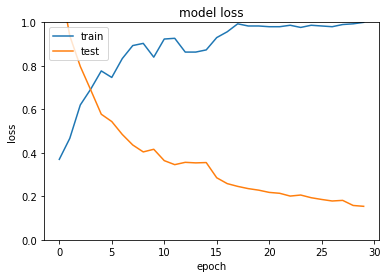

In [5]:
print('****** Adam optimizer ******')
model_adam, history_adam = linear_model(X_train, Y_train, 'adam', epochs=30, verbose=False)

plot_history(history_adam)

### 4 Visualization of the solution

Now that our linear network is working, we will look at the values of the weights applied inside it. Those paramters are simply the ones of the vector A such that $Y_i=A_i^T*X$. Thus, each vector $A_i$ has the same size of the pictures given as inputs, we can then show them like images, which is done just after :

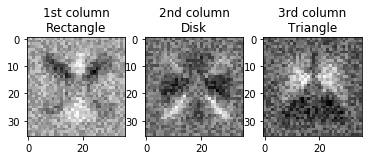

In [6]:
weights = model_sgd.get_weights()
width_w = int(np.sqrt(weights[0][::,0].shape))

plt.subplot(131); plt.imshow(weights[0][::,0].reshape(width_w, width_w), cmap='gray'); plt.title('1st column\nRectangle')
plt.subplot(132); plt.imshow(weights[0][::,1].reshape(width_w, width_w), cmap='gray'); plt.title('2nd column\nDisk')
plt.subplot(133); plt.imshow(weights[0][::,2].reshape(width_w, width_w), cmap='gray'); plt.title('3rd column\nTriangle')
plt.show()


We can see on those images what pixels of the image are used to determine the shape of the drawing. For exemple, for the circles, mainly the diagonals seems to count, while on the triangle, it would be the pixels over the two inclined edges of the triangle, which are inside of the other shapes, but out of the triangle for example.

###5 A more difficult classification problem

Now, the shapes are allowed to move within the images and change dimensions. Thus, we will need a much more robust neuronal network

Creating dataset:   0%|          | 0/300 [00:00<?, ?it/s]

Creating dataset:   3%|▎         | 10/300 [00:00<00:02, 99.28it/s]

Creating dataset:   7%|▋         | 21/300 [00:00<00:02, 100.38it/s]

Creating dataset:  10%|█         | 30/300 [00:00<00:02, 92.06it/s] 

Creating dataset:  13%|█▎        | 40/300 [00:00<00:02, 92.81it/s]

Creating dataset:  17%|█▋        | 51/300 [00:00<00:02, 96.17it/s]

Creating dataset:  20%|██        | 61/300 [00:00<00:02, 95.42it/s]

Creating dataset:  24%|██▎       | 71/300 [00:00<00:02, 95.44it/s]

Creating dataset:  27%|██▋       | 81/300 [00:00<00:02, 94.64it/s]

Creating dataset:  30%|███       | 91/300 [00:00<00:02, 95.71it/s]

Creating dataset:  34%|███▎      | 101/300 [00:01<00:02, 95.37it/s]

Creating dataset:  37%|███▋      | 111/300 [00:01<00:01, 95.41it/s]

Creating dataset:  40%|████      | 121/300 [00:01<00:01, 95.43it/s]

Creating dataset:  44%|████▍     | 132/300 [00:01<00:01, 97.35it/s]

Creating dataset:  47%|████▋     | 142/300 [00:01<00:01, 97.63it/s]

Creating dataset:  51%|█████     | 152/300 [00:02<00:03, 38.34it/s]

Creating dataset:  54%|█████▍    | 163/300 [00:02<00:02, 47.06it/s]

Creating dataset:  58%|█████▊    | 174/300 [00:02<00:02, 56.75it/s]

Creating dataset:  62%|██████▏   | 185/300 [00:02<00:01, 65.36it/s]

Creating dataset:  65%|██████▌   | 196/300 [00:02<00:01, 73.13it/s]

Creating dataset:  69%|██████▉   | 207/300 [00:02<00:01, 80.64it/s]

Creating dataset:  73%|███████▎  | 218/300 [00:02<00:00, 87.09it/s]

Creating dataset:  76%|███████▋  | 229/300 [00:02<00:00, 92.25it/s]

Creating dataset:  80%|████████  | 240/300 [00:03<00:00, 71.95it/s]

Creating dataset:  84%|████████▎ | 251/300 [00:03<00:00, 79.64it/s]

Creating dataset:  87%|████████▋ | 262/300 [00:03<00:00, 86.68it/s]

Creating dataset:  91%|█████████ | 272/300 [00:03<00:00, 90.11it/s]

Creating dataset:  94%|█████████▍| 283/300 [00:03<00:00, 92.70it/s]

Creating dataset:  98%|█████████▊| 294/300 [00:03<00:00, 95.84it/s]

Creating dataset: 100%|██████████| 300/300 [00:03<00:00, 81.96it/s]

Creating dataset:   0%|          | 0/300 [00:00<?, ?it/s]

Creating dataset:   4%|▎         | 11/300 [00:00<00:02, 109.20it/s]

Creating dataset:   7%|▋         | 22/300 [00:00<00:02, 108.56it/s]

Creating dataset:  11%|█         | 33/300 [00:00<00:02, 107.79it/s]

Creating dataset:  14%|█▎        | 41/300 [00:00<00:03, 65.43it/s] 

Creating dataset:  17%|█▋        | 52/300 [00:00<00:03, 73.48it/s]

Creating dataset:  21%|██        | 63/300 [00:00<00:02, 80.94it/s]

Creating dataset:  25%|██▍       | 74/300 [00:00<00:02, 86.52it/s]

Creating dataset:  28%|██▊       | 85/300 [00:00<00:02, 92.03it/s]

Creating dataset:  32%|███▏      | 96/300 [00:01<00:02, 95.83it/s]

Creating dataset:  36%|███▌      | 107/300 [00:01<00:01, 98.69it/s]

Creating dataset:  39%|███▉      | 118/300 [00:01<00:01, 100.78it/s]

Creating dataset:  43%|████▎     | 129/300 [00:01<00:01, 102.03it/s]

Creating dataset:  47%|████▋     | 140/300 [00:01<00:01, 102.63it/s]

Creating dataset:  50%|█████     | 151/300 [00:01<00:01, 101.07it/s]

Creating dataset:  54%|█████▍    | 162/300 [00:01<00:01, 101.94it/s]

Creating dataset:  58%|█████▊    | 173/300 [00:01<00:01, 103.14it/s]

Creating dataset:  61%|██████▏   | 184/300 [00:02<00:01, 65.01it/s] 

Creating dataset:  65%|██████▌   | 195/300 [00:02<00:01, 73.40it/s]

Creating dataset:  69%|██████▊   | 206/300 [00:02<00:01, 80.87it/s]

Creating dataset:  72%|███████▏  | 217/300 [00:02<00:00, 86.46it/s]

Creating dataset:  76%|███████▌  | 228/300 [00:02<00:00, 91.08it/s]

Creating dataset:  80%|███████▉  | 239/300 [00:02<00:00, 94.62it/s]

Creating dataset:  83%|████████▎ | 250/300 [00:02<00:00, 97.27it/s]

Creating dataset:  87%|████████▋ | 261/300 [00:02<00:00, 98.94it/s]

Creating dataset:  91%|█████████ | 272/300 [00:02<00:00, 100.69it/s]

Creating dataset:  94%|█████████▍| 283/300 [00:03<00:00, 101.40it/s]

Creating dataset:  98%|█████████▊| 294/300 [00:03<00:00, 101.90it/s]

Creating dataset: 100%|██████████| 300/300 [00:03<00:00, 92.70it/s] 

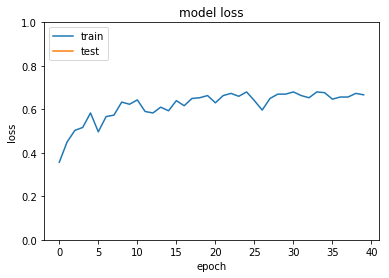

***** Results on the test dataset *****

Loss: 5.800738259951274 | Accuracy: 0.5433333325386047

In [11]:
from mp1_test_set import *

[X_train, Y_train] = generate_dataset_classification(300, 20, True)
model_lin, history_lin = linear_model(X_train, Y_train, epochs=40, verbose=False)

[X_test, Y_test] = generate_test_set_classification()
width = int(np.sqrt(X_test[0].shape[0]))
X_test = X_test.reshape(X_test.shape[0], width, width)
X_test = X_test[::, ::2, ::2]

plot_history(history_lin)
print('***** Results on the test dataset *****')
evaluation = model_lin.evaluate(X_test, Y_test, verbose=False)
print('Loss: %s | Accuracy: %s' % (evaluation[0], evaluation[1]))


The previously used linear model achieves really low scores on this new task.

We will then use a new deep network to complete this task, composed of 1 convolutional layer with 16 5×5 filters, 1 pooling layer, and one fully connected layer.

Creating dataset:   0%|          | 0/50 [00:00<?, ?it/s]

Creating dataset:  10%|█         | 5/50 [00:00<00:01, 44.67it/s]

Creating dataset:  18%|█▊        | 9/50 [00:00<00:01, 40.42it/s]

Creating dataset:  22%|██▏       | 11/50 [00:00<00:01, 22.88it/s]

Creating dataset:  26%|██▌       | 13/50 [00:00<00:02, 16.63it/s]

Creating dataset:  30%|███       | 15/50 [00:00<00:02, 13.48it/s]

Creating dataset:  36%|███▌      | 18/50 [00:00<00:02, 15.79it/s]

Creating dataset:  42%|████▏     | 21/50 [00:01<00:01, 17.82it/s]

Creating dataset:  48%|████▊     | 24/50 [00:01<00:01, 19.06it/s]

Creating dataset:  58%|█████▊    | 29/50 [00:01<00:00, 22.80it/s]

Creating dataset:  68%|██████▊   | 34/50 [00:01<00:00, 27.20it/s]

Creating dataset:  76%|███████▌  | 38/50 [00:01<00:00, 25.74it/s]

Creating dataset:  84%|████████▍ | 42/50 [00:01<00:00, 24.53it/s]

Creating dataset:  92%|█████████▏| 46/50 [00:01<00:00, 26.23it/s]

Creating dataset: 100%|██████████| 50/50 [00:02<00:00, 27.79it/s]

Creating dataset:   0%|          | 0/300 [00:00<?, ?it/s]

Creating dataset:   1%|▏         | 4/300 [00:00<00:09, 31.03it/s]

Creating dataset:   3%|▎         | 8/300 [00:00<00:09, 31.03it/s]

Creating dataset:   4%|▍         | 12/300 [00:00<00:08, 32.54it/s]

Creating dataset:   5%|▌         | 16/300 [00:00<00:08, 33.86it/s]

Creating dataset:   7%|▋         | 21/300 [00:00<00:07, 37.24it/s]

Creating dataset:   8%|▊         | 25/300 [00:00<00:07, 37.40it/s]

Creating dataset:  10%|█         | 30/300 [00:00<00:06, 39.50it/s]

Creating dataset:  12%|█▏        | 37/300 [00:00<00:05, 44.16it/s]

Creating dataset:  15%|█▍        | 44/300 [00:01<00:05, 48.83it/s]

Creating dataset:  17%|█▋        | 50/300 [00:01<00:05, 49.92it/s]

Creating dataset:  19%|█▊        | 56/300 [00:01<00:04, 51.76it/s]

Creating dataset:  21%|██        | 62/300 [00:01<00:04, 52.57it/s]

Creating dataset:  23%|██▎       | 69/300 [00:01<00:04, 54.57it/s]

Creating dataset:  25%|██▌       | 76/300 [00:01<00:03, 56.74it/s]

Creating dataset:  27%|██▋       | 82/300 [00:01<00:03, 57.52it/s]

Creating dataset:  29%|██▉       | 88/300 [00:01<00:03, 57.25it/s]

Creating dataset:  32%|███▏      | 95/300 [00:03<00:20,  9.96it/s]

Creating dataset:  33%|███▎      | 100/300 [00:03<00:15, 13.04it/s]

Creating dataset:  35%|███▌      | 106/300 [00:04<00:11, 16.89it/s]

Creating dataset:  38%|███▊      | 113/300 [00:04<00:08, 21.64it/s]

Creating dataset:  40%|████      | 120/300 [00:04<00:06, 26.98it/s]

Creating dataset:  42%|████▏     | 127/300 [00:04<00:05, 32.53it/s]

Creating dataset:  45%|████▍     | 134/300 [00:04<00:04, 38.25it/s]

Creating dataset:  47%|████▋     | 141/300 [00:04<00:03, 43.46it/s]

Creating dataset:  49%|████▉     | 148/300 [00:04<00:03, 48.23it/s]

Creating dataset:  52%|█████▏    | 155/300 [00:04<00:02, 52.13it/s]

Creating dataset:  54%|█████▍    | 162/300 [00:04<00:02, 53.73it/s]

Creating dataset:  56%|█████▋    | 169/300 [00:05<00:02, 56.79it/s]

Creating dataset:  59%|█████▊    | 176/300 [00:05<00:03, 36.78it/s]

Creating dataset:  60%|██████    | 181/300 [00:05<00:03, 34.29it/s]

Creating dataset:  62%|██████▏   | 186/300 [00:05<00:03, 32.73it/s]

Creating dataset:  63%|██████▎   | 190/300 [00:05<00:03, 34.53it/s]

Creating dataset:  65%|██████▌   | 195/300 [00:05<00:02, 37.39it/s]

Creating dataset:  67%|██████▋   | 200/300 [00:06<00:02, 40.26it/s]

Creating dataset:  69%|██████▉   | 207/300 [00:06<00:02, 45.16it/s]

Creating dataset:  71%|███████   | 213/300 [00:06<00:01, 47.63it/s]

Creating dataset:  73%|███████▎  | 219/300 [00:06<00:02, 40.34it/s]

Creating dataset:  75%|███████▍  | 224/300 [00:06<00:02, 31.92it/s]

Creating dataset:  76%|███████▌  | 228/300 [00:06<00:02, 26.81it/s]

Creating dataset:  77%|███████▋  | 232/300 [00:07<00:02, 23.44it/s]

Creating dataset:  78%|███████▊  | 235/300 [00:07<00:03, 20.89it/s]

Creating dataset:  80%|███████▉  | 239/300 [00:07<00:02, 23.87it/s]

Creating dataset:  82%|████████▏ | 246/300 [00:07<00:01, 29.34it/s]

Creating dataset:  84%|████████▍ | 253/300 [00:07<00:01, 34.90it/s]

Creating dataset:  87%|████████▋ | 260/300 [00:07<00:00, 40.23it/s]

Creating dataset:  89%|████████▉ | 267/300 [00:07<00:00, 45.31it/s]

Creating dataset:  91%|█████████ | 273/300 [00:08<00:00, 31.76it/s]

Creating dataset:  93%|█████████▎| 280/300 [00:08<00:00, 37.62it/s]

Creating dataset:  96%|█████████▌| 287/300 [00:08<00:00, 42.96it/s]

Creating dataset:  98%|█████████▊| 294/300 [00:08<00:00, 47.71it/s]

Creating dataset: 100%|██████████| 300/300 [00:08<00:00, 34.85it/s]

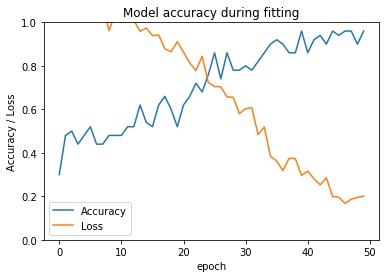

***** Results on the test dataset *****

Loss: 1.2442502975463867 | Accuracy: 0.5666666674613953

In [2]:
%matplotlib inline
from mp1_test_set import *
from mp1_models import *
from mp1_dataset import *

[X_train, Y_train] = generate_dataset_classification(500, 20, True)
model_conv, history_conv = convolutionnal_model(X_train, Y_train, 'sgd', epochs=50, verbose=False)

[X_test, Y_test] = generate_test_set_classification()
X_test = adapt_dataset(X_test)
X_test = X_test.reshape(X_test.shape + (1,))

plot_history(history_conv)
print('***** Results on the test dataset *****')
evaluation = model_conv.evaluate(X_test, Y_test, verbose=False)
print('Loss: %s | Accuracy: %s' % (evaluation[0], evaluation[1]))


This new model presents much better results : it obtain an accuracy of almost 1 on the training dataset, and a 83% accuracy on the test dataset, when the training one was of 500 samples.

### 6. A regression problem

In this part, I tried to create a regression network to predict the positions of the 3 corners of a triangle.

Firstly, I had to 'normalize' the outputs of the dataset: indeed, the coordinates of the points were random numbers between 0 and 1, thus the 3 edges were not sorted, and there were thus, for each picture, 3 possible answers, depending on the sorting order of the points. Hence, the first step was to sort those three points in a 'logical' way. To do that, I decided to sort them in growing order of their norms. This was the last solution I tried, though I tried other solutions before, as can be seen in the code (e.g. the first point was the higher one, and the two others were sorted in trigonomic order).

Then, this dataset was sent in a regression network made of 4 Convolution-MaxPooling and two Dense layers. Unfortunately, with the best learning rate possible, this solution stayed at an accuracy of only 0.4, without growing. Many other configurations had been tested before, and this one is the one with the best 'theorical' results. In fact, if 'theorically', the accuracy is about 0.4, on the test dataset, the results are aberrant, the model predicting coordinates higher than $10e4$ while the results should be between 0 and 1.

In conclusion, I unfortunately failed to implement this regression task, despite a huge number of tries.

Creating dataset:   0%|          | 0/1000 [00:00<?, ?it/s]

Creating dataset:   0%|          | 4/1000 [00:00<00:30, 32.81it/s]

Creating dataset:   1%|          | 10/1000 [00:00<00:26, 37.62it/s]

Creating dataset:   2%|▏         | 16/1000 [00:00<00:23, 41.14it/s]

Creating dataset:   2%|▏         | 21/1000 [00:00<00:22, 43.35it/s]

Creating dataset:   3%|▎         | 26/1000 [00:00<00:22, 42.62it/s]

Creating dataset:   3%|▎         | 31/1000 [00:00<00:21, 44.48it/s]

Creating dataset:   4%|▎         | 36/1000 [00:00<00:22, 43.27it/s]

Creating dataset:   4%|▍         | 44/1000 [00:00<00:19, 48.63it/s]

Creating dataset:   5%|▌         | 52/1000 [00:01<00:17, 53.74it/s]

Creating dataset:   6%|▌         | 58/1000 [00:01<00:17, 53.99it/s]

Creating dataset:   6%|▋         | 64/1000 [00:01<00:17, 53.02it/s]

Creating dataset:   7%|▋         | 70/1000 [00:01<00:18, 50.00it/s]

Creating dataset:   8%|▊         | 76/1000 [00:01<00:33, 27.60it/s]

Creating dataset:   8%|▊         | 82/1000 [00:01<00:28, 31.99it/s]

Creating dataset:   9%|▊         | 87/1000 [00:02<00:25, 35.41it/s]

Creating dataset:   9%|▉         | 93/1000 [00:02<00:23, 39.04it/s]

Creating dataset:  10%|▉         | 98/1000 [00:02<00:21, 41.69it/s]

Creating dataset:  10%|█         | 103/1000 [00:02<00:21, 42.11it/s]

Creating dataset:  11%|█         | 109/1000 [00:02<00:19, 44.60it/s]

Creating dataset:  11%|█▏        | 114/1000 [00:02<00:19, 45.60it/s]

Creating dataset:  12%|█▏        | 119/1000 [00:02<00:19, 46.06it/s]

Creating dataset:  12%|█▏        | 124/1000 [00:02<00:18, 46.40it/s]

Creating dataset:  13%|█▎        | 129/1000 [00:03<00:25, 34.06it/s]

Creating dataset:  13%|█▎        | 134/1000 [00:03<00:23, 36.92it/s]

Creating dataset:  14%|█▍        | 140/1000 [00:03<00:21, 39.59it/s]

Creating dataset:  14%|█▍        | 145/1000 [00:03<00:21, 40.69it/s]

Creating dataset:  15%|█▌        | 151/1000 [00:03<00:19, 43.57it/s]

Creating dataset:  16%|█▌        | 156/1000 [00:03<00:19, 43.10it/s]

Creating dataset:  16%|█▌        | 161/1000 [00:03<00:18, 44.85it/s]

Creating dataset:  17%|█▋        | 167/1000 [00:03<00:17, 48.47it/s]

Creating dataset:  17%|█▋        | 174/1000 [00:03<00:15, 52.09it/s]

Creating dataset:  18%|█▊        | 182/1000 [00:04<00:14, 56.83it/s]

Creating dataset:  19%|█▉        | 190/1000 [00:04<00:13, 60.69it/s]

Creating dataset:  20%|█▉        | 197/1000 [00:04<00:17, 45.04it/s]

Creating dataset:  20%|██        | 205/1000 [00:04<00:15, 51.15it/s]

Creating dataset:  21%|██        | 212/1000 [00:04<00:14, 54.61it/s]

Creating dataset:  22%|██▏       | 219/1000 [00:04<00:13, 57.05it/s]

Creating dataset:  23%|██▎       | 227/1000 [00:04<00:12, 61.00it/s]

Creating dataset:  24%|██▎       | 235/1000 [00:04<00:11, 63.80it/s]

Creating dataset:  24%|██▍       | 242/1000 [00:05<00:11, 64.47it/s]

Creating dataset:  25%|██▌       | 250/1000 [00:05<00:11, 66.58it/s]

Creating dataset:  26%|██▌       | 257/1000 [00:05<00:11, 66.81it/s]

Creating dataset:  26%|██▋       | 264/1000 [00:05<00:10, 67.16it/s]

Creating dataset:  27%|██▋       | 271/1000 [00:05<00:11, 62.04it/s]

Creating dataset:  28%|██▊       | 278/1000 [00:05<00:20, 34.62it/s]

Creating dataset:  28%|██▊       | 283/1000 [00:06<00:20, 35.24it/s]

Creating dataset:  29%|██▉       | 288/1000 [00:06<00:19, 35.92it/s]

Creating dataset:  29%|██▉       | 293/1000 [00:06<00:19, 36.33it/s]

Creating dataset:  30%|██▉       | 298/1000 [00:06<00:18, 37.28it/s]

Creating dataset:  30%|███       | 303/1000 [00:06<00:17, 39.70it/s]

Creating dataset:  31%|███       | 311/1000 [00:06<00:15, 45.81it/s]

Creating dataset:  32%|███▏      | 319/1000 [00:06<00:13, 51.34it/s]

Creating dataset:  33%|███▎      | 326/1000 [00:06<00:12, 55.67it/s]

Creating dataset:  33%|███▎      | 333/1000 [00:07<00:11, 57.29it/s]

Creating dataset:  34%|███▍      | 340/1000 [00:07<00:11, 58.47it/s]

Creating dataset:  35%|███▍      | 347/1000 [00:07<00:10, 59.64it/s]

Creating dataset:  35%|███▌      | 354/1000 [00:07<00:10, 62.25it/s]

Creating dataset:  36%|███▌      | 361/1000 [00:07<00:10, 63.87it/s]

Creating dataset:  37%|███▋      | 368/1000 [00:07<00:09, 64.70it/s]

Creating dataset:  38%|███▊      | 375/1000 [00:07<00:09, 66.02it/s]

Creating dataset:  38%|███▊      | 382/1000 [00:07<00:15, 40.15it/s]

Creating dataset:  39%|███▉      | 390/1000 [00:08<00:13, 46.30it/s]

Creating dataset:  40%|███▉      | 397/1000 [00:08<00:11, 50.87it/s]

Creating dataset:  40%|████      | 404/1000 [00:08<00:11, 54.01it/s]

Creating dataset:  41%|████      | 412/1000 [00:08<00:10, 58.16it/s]

Creating dataset:  42%|████▏     | 419/1000 [00:08<00:09, 60.80it/s]

Creating dataset:  43%|████▎     | 426/1000 [00:08<00:09, 62.62it/s]

Creating dataset:  43%|████▎     | 433/1000 [00:08<00:08, 63.62it/s]

Creating dataset:  44%|████▍     | 441/1000 [00:08<00:08, 65.62it/s]

Creating dataset:  45%|████▍     | 448/1000 [00:08<00:08, 65.58it/s]

Creating dataset:  46%|████▌     | 455/1000 [00:09<00:08, 65.18it/s]

Creating dataset:  46%|████▌     | 462/1000 [00:09<00:08, 64.18it/s]

Creating dataset:  47%|████▋     | 469/1000 [00:09<00:08, 64.03it/s]

Creating dataset:  48%|████▊     | 476/1000 [00:09<00:08, 63.23it/s]

Creating dataset:  48%|████▊     | 483/1000 [00:09<00:08, 61.69it/s]

Creating dataset:  49%|████▉     | 490/1000 [00:09<00:08, 57.52it/s]

Creating dataset:  50%|████▉     | 498/1000 [00:09<00:08, 60.40it/s]

Creating dataset:  50%|█████     | 505/1000 [00:09<00:10, 48.78it/s]

Creating dataset:  51%|█████     | 511/1000 [00:10<00:24, 20.15it/s]

Creating dataset:  52%|█████▏    | 515/1000 [00:10<00:25, 19.24it/s]

Creating dataset:  52%|█████▏    | 519/1000 [00:11<00:24, 19.84it/s]

Creating dataset:  52%|█████▏    | 522/1000 [00:11<00:25, 18.63it/s]

Creating dataset:  52%|█████▎    | 525/1000 [00:11<00:22, 20.94it/s]

Creating dataset:  53%|█████▎    | 528/1000 [00:11<00:20, 22.92it/s]

Creating dataset:  53%|█████▎    | 531/1000 [00:11<00:19, 24.08it/s]

Creating dataset:  54%|█████▎    | 535/1000 [00:11<00:18, 25.81it/s]

Creating dataset:  54%|█████▍    | 538/1000 [00:11<00:17, 26.17it/s]

Creating dataset:  54%|█████▍    | 541/1000 [00:11<00:18, 25.42it/s]

Creating dataset:  54%|█████▍    | 544/1000 [00:12<00:20, 22.46it/s]

Creating dataset:  55%|█████▍    | 547/1000 [00:12<00:20, 22.44it/s]

Creating dataset:  55%|█████▌    | 550/1000 [00:12<00:24, 18.70it/s]

Creating dataset:  55%|█████▌    | 553/1000 [00:12<00:23, 18.72it/s]

Creating dataset:  56%|█████▌    | 556/1000 [00:12<00:23, 18.52it/s]

Creating dataset:  56%|█████▌    | 558/1000 [00:12<00:25, 17.28it/s]

Creating dataset:  56%|█████▌    | 560/1000 [00:13<00:24, 17.77it/s]

Creating dataset:  56%|█████▋    | 563/1000 [00:13<00:23, 18.56it/s]

Creating dataset:  57%|█████▋    | 566/1000 [00:13<00:22, 19.12it/s]

Creating dataset:  57%|█████▋    | 569/1000 [00:13<00:21, 20.00it/s]

Creating dataset:  57%|█████▋    | 572/1000 [00:13<00:21, 20.26it/s]

Creating dataset:  57%|█████▊    | 575/1000 [00:13<00:20, 21.17it/s]

Creating dataset:  58%|█████▊    | 578/1000 [00:13<00:18, 22.24it/s]

Creating dataset:  58%|█████▊    | 581/1000 [00:14<00:18, 22.44it/s]

Creating dataset:  58%|█████▊    | 584/1000 [00:14<00:21, 19.16it/s]

Creating dataset:  59%|█████▊    | 587/1000 [00:14<00:24, 17.15it/s]

Creating dataset:  59%|█████▉    | 589/1000 [00:14<00:24, 16.96it/s]

Creating dataset:  59%|█████▉    | 592/1000 [00:14<00:22, 18.36it/s]

Creating dataset:  59%|█████▉    | 594/1000 [00:14<00:22, 18.31it/s]

Creating dataset:  60%|█████▉    | 596/1000 [00:14<00:24, 16.72it/s]

Creating dataset:  60%|█████▉    | 598/1000 [00:15<00:27, 14.37it/s]

Creating dataset:  60%|██████    | 600/1000 [00:15<00:28, 14.13it/s]

Creating dataset:  60%|██████    | 602/1000 [00:15<00:29, 13.69it/s]

Creating dataset:  60%|██████    | 604/1000 [00:15<00:28, 13.95it/s]

Creating dataset:  61%|██████    | 606/1000 [00:15<00:26, 14.64it/s]

Creating dataset:  61%|██████    | 608/1000 [00:15<00:24, 15.81it/s]

Creating dataset:  61%|██████    | 610/1000 [00:15<00:24, 16.02it/s]

Creating dataset:  61%|██████    | 612/1000 [00:16<00:27, 14.24it/s]

Creating dataset:  61%|██████▏   | 614/1000 [00:16<00:29, 13.29it/s]

Creating dataset:  62%|██████▏   | 617/1000 [00:16<00:25, 15.11it/s]

Creating dataset:  62%|██████▏   | 620/1000 [00:16<00:22, 16.69it/s]

Creating dataset:  62%|██████▏   | 622/1000 [00:16<00:21, 17.20it/s]

Creating dataset:  62%|██████▏   | 624/1000 [00:16<00:23, 16.06it/s]

Creating dataset:  63%|██████▎   | 627/1000 [00:16<00:21, 17.61it/s]

Creating dataset:  63%|██████▎   | 629/1000 [00:17<00:21, 17.46it/s]

Creating dataset:  63%|██████▎   | 631/1000 [00:17<00:21, 16.91it/s]

Creating dataset:  63%|██████▎   | 633/1000 [00:17<00:21, 17.41it/s]

Creating dataset:  64%|██████▎   | 635/1000 [00:17<00:20, 18.07it/s]

Creating dataset:  64%|██████▎   | 637/1000 [00:17<00:21, 17.13it/s]

Creating dataset:  64%|██████▍   | 639/1000 [00:17<00:25, 14.33it/s]

Creating dataset:  64%|██████▍   | 641/1000 [00:17<00:23, 15.48it/s]

Creating dataset:  64%|██████▍   | 643/1000 [00:17<00:23, 15.35it/s]

Creating dataset:  64%|██████▍   | 645/1000 [00:18<00:23, 15.33it/s]

Creating dataset:  65%|██████▍   | 647/1000 [00:18<00:24, 14.26it/s]

Creating dataset:  65%|██████▍   | 649/1000 [00:18<00:23, 14.98it/s]

Creating dataset:  65%|██████▌   | 651/1000 [00:18<00:22, 15.59it/s]

Creating dataset:  65%|██████▌   | 653/1000 [00:18<00:24, 14.27it/s]

Creating dataset:  66%|██████▌   | 655/1000 [00:18<00:22, 15.40it/s]

Creating dataset:  66%|██████▌   | 657/1000 [00:18<00:21, 15.91it/s]

Creating dataset:  66%|██████▌   | 659/1000 [00:18<00:20, 16.70it/s]

Creating dataset:  66%|██████▌   | 662/1000 [00:19<00:18, 18.28it/s]

Creating dataset:  66%|██████▋   | 665/1000 [00:19<00:16, 20.54it/s]

Creating dataset:  67%|██████▋   | 668/1000 [00:19<00:15, 21.99it/s]

Creating dataset:  67%|██████▋   | 671/1000 [00:19<00:13, 23.68it/s]

Creating dataset:  67%|██████▋   | 674/1000 [00:20<00:50,  6.43it/s]

Creating dataset:  68%|██████▊   | 676/1000 [00:20<00:40,  7.91it/s]

Creating dataset:  68%|██████▊   | 678/1000 [00:20<00:33,  9.51it/s]

Creating dataset:  68%|██████▊   | 681/1000 [00:21<00:28, 11.38it/s]

Creating dataset:  68%|██████▊   | 683/1000 [00:21<00:24, 13.05it/s]

Creating dataset:  69%|██████▊   | 686/1000 [00:21<00:20, 15.52it/s]

Creating dataset:  69%|██████▉   | 689/1000 [00:21<00:17, 17.70it/s]

Creating dataset:  69%|██████▉   | 692/1000 [00:21<00:16, 19.03it/s]

Creating dataset:  70%|██████▉   | 696/1000 [00:21<00:13, 21.84it/s]

Creating dataset:  70%|██████▉   | 699/1000 [00:21<00:13, 21.67it/s]

Creating dataset:  70%|███████   | 703/1000 [00:21<00:12, 23.74it/s]

Creating dataset:  71%|███████   | 706/1000 [00:21<00:12, 24.17it/s]

Creating dataset:  71%|███████   | 709/1000 [00:22<00:11, 25.22it/s]

Creating dataset:  71%|███████   | 712/1000 [00:22<00:11, 25.41it/s]

Creating dataset:  72%|███████▏  | 715/1000 [00:22<00:11, 25.42it/s]

Creating dataset:  72%|███████▏  | 718/1000 [00:22<00:13, 21.31it/s]

Creating dataset:  72%|███████▏  | 721/1000 [00:22<00:12, 22.15it/s]

Creating dataset:  72%|███████▏  | 724/1000 [00:22<00:11, 23.42it/s]

Creating dataset:  73%|███████▎  | 727/1000 [00:22<00:11, 23.71it/s]

Creating dataset:  73%|███████▎  | 730/1000 [00:23<00:11, 23.41it/s]

Creating dataset:  73%|███████▎  | 733/1000 [00:23<00:11, 23.81it/s]

Creating dataset:  74%|███████▎  | 736/1000 [00:23<00:10, 24.82it/s]

Creating dataset:  74%|███████▍  | 739/1000 [00:23<00:10, 24.88it/s]

Creating dataset:  74%|███████▍  | 742/1000 [00:23<00:09, 25.82it/s]

Creating dataset:  74%|███████▍  | 745/1000 [00:23<00:09, 26.81it/s]

Creating dataset:  75%|███████▍  | 749/1000 [00:23<00:09, 27.83it/s]

Creating dataset:  75%|███████▌  | 753/1000 [00:23<00:08, 28.72it/s]

Creating dataset:  76%|███████▌  | 756/1000 [00:23<00:08, 28.84it/s]

Creating dataset:  76%|███████▌  | 759/1000 [00:24<00:09, 24.53it/s]

Creating dataset:  76%|███████▋  | 763/1000 [00:24<00:09, 26.28it/s]

Creating dataset:  77%|███████▋  | 767/1000 [00:24<00:08, 28.61it/s]

Creating dataset:  77%|███████▋  | 771/1000 [00:24<00:07, 30.22it/s]

Creating dataset:  78%|███████▊  | 775/1000 [00:24<00:07, 28.75it/s]

Creating dataset:  78%|███████▊  | 778/1000 [00:24<00:09, 22.45it/s]

Creating dataset:  78%|███████▊  | 781/1000 [00:25<00:11, 19.66it/s]

Creating dataset:  78%|███████▊  | 784/1000 [00:25<00:11, 18.73it/s]

Creating dataset:  79%|███████▊  | 787/1000 [00:25<00:11, 18.50it/s]

Creating dataset:  79%|███████▉  | 789/1000 [00:25<00:11, 18.30it/s]

Creating dataset:  79%|███████▉  | 792/1000 [00:25<00:10, 20.06it/s]

Creating dataset:  80%|███████▉  | 796/1000 [00:25<00:10, 20.32it/s]

Creating dataset:  80%|███████▉  | 799/1000 [00:25<00:10, 18.93it/s]

Creating dataset:  80%|████████  | 801/1000 [00:26<00:12, 16.04it/s]

Creating dataset:  80%|████████  | 803/1000 [00:26<00:13, 14.41it/s]

Creating dataset:  80%|████████  | 805/1000 [00:26<00:12, 15.54it/s]

Creating dataset:  81%|████████  | 808/1000 [00:26<00:10, 17.79it/s]

Creating dataset:  81%|████████  | 811/1000 [00:26<00:09, 19.44it/s]

Creating dataset:  81%|████████▏ | 814/1000 [00:26<00:08, 21.27it/s]

Creating dataset:  82%|████████▏ | 817/1000 [00:26<00:07, 22.99it/s]

Creating dataset:  82%|████████▏ | 821/1000 [00:26<00:07, 25.55it/s]

Creating dataset:  82%|████████▏ | 824/1000 [00:27<00:06, 25.98it/s]

Creating dataset:  83%|████████▎ | 828/1000 [00:27<00:06, 27.25it/s]

Creating dataset:  83%|████████▎ | 832/1000 [00:27<00:05, 28.17it/s]

Creating dataset:  84%|████████▎ | 835/1000 [00:27<00:05, 28.45it/s]

Creating dataset:  84%|████████▍ | 838/1000 [00:27<00:05, 27.48it/s]

Creating dataset:  84%|████████▍ | 841/1000 [00:27<00:05, 26.98it/s]

Creating dataset:  84%|████████▍ | 844/1000 [00:27<00:06, 25.23it/s]

Creating dataset:  85%|████████▍ | 847/1000 [00:28<00:07, 19.14it/s]

Creating dataset:  85%|████████▌ | 850/1000 [00:28<00:10, 14.65it/s]

Creating dataset:  85%|████████▌ | 852/1000 [00:28<00:09, 14.80it/s]

Creating dataset:  85%|████████▌ | 854/1000 [00:28<00:09, 15.64it/s]

Creating dataset:  86%|████████▌ | 857/1000 [00:28<00:08, 17.75it/s]

Creating dataset:  86%|████████▌ | 860/1000 [00:28<00:06, 20.07it/s]

Creating dataset:  86%|████████▋ | 863/1000 [00:28<00:06, 21.33it/s]

Creating dataset:  87%|████████▋ | 866/1000 [00:29<00:06, 22.27it/s]

Creating dataset:  87%|████████▋ | 869/1000 [00:29<00:05, 22.56it/s]

Creating dataset:  87%|████████▋ | 872/1000 [00:29<00:05, 23.91it/s]

Creating dataset:  88%|████████▊ | 875/1000 [00:30<00:22,  5.47it/s]

Creating dataset:  88%|████████▊ | 877/1000 [00:31<00:19,  6.31it/s]

Creating dataset:  88%|████████▊ | 879/1000 [00:31<00:17,  7.08it/s]

Creating dataset:  88%|████████▊ | 881/1000 [00:31<00:15,  7.93it/s]

Creating dataset:  88%|████████▊ | 883/1000 [00:31<00:12,  9.32it/s]

Creating dataset:  89%|████████▊ | 886/1000 [00:31<00:09, 11.68it/s]

Creating dataset:  89%|████████▉ | 889/1000 [00:31<00:07, 13.94it/s]

Creating dataset:  89%|████████▉ | 892/1000 [00:31<00:06, 15.87it/s]

Creating dataset:  90%|████████▉ | 895/1000 [00:32<00:05, 17.61it/s]

Creating dataset:  90%|████████▉ | 898/1000 [00:32<00:05, 19.10it/s]

Creating dataset:  90%|█████████ | 902/1000 [00:32<00:04, 22.46it/s]

Creating dataset:  91%|█████████ | 906/1000 [00:32<00:03, 25.23it/s]

Creating dataset:  91%|█████████ | 909/1000 [00:32<00:03, 26.29it/s]

Creating dataset:  91%|█████████ | 912/1000 [00:32<00:03, 25.43it/s]

Creating dataset:  92%|█████████▏| 916/1000 [00:32<00:03, 26.89it/s]

Creating dataset:  92%|█████████▏| 919/1000 [00:32<00:03, 24.74it/s]

Creating dataset:  92%|█████████▏| 922/1000 [00:33<00:03, 23.99it/s]

Creating dataset:  92%|█████████▎| 925/1000 [00:33<00:03, 23.71it/s]

Creating dataset:  93%|█████████▎| 928/1000 [00:33<00:03, 21.50it/s]

Creating dataset:  93%|█████████▎| 931/1000 [00:33<00:02, 23.07it/s]

Creating dataset:  93%|█████████▎| 934/1000 [00:33<00:02, 23.73it/s]

Creating dataset:  94%|█████████▎| 937/1000 [00:33<00:02, 23.87it/s]

Creating dataset:  94%|█████████▍| 940/1000 [00:33<00:02, 23.52it/s]

Creating dataset:  94%|█████████▍| 943/1000 [00:33<00:02, 23.84it/s]

Creating dataset:  95%|█████████▍| 946/1000 [00:34<00:02, 21.39it/s]

Creating dataset:  95%|█████████▍| 949/1000 [00:34<00:02, 20.48it/s]

Creating dataset:  95%|█████████▌| 952/1000 [00:34<00:02, 18.99it/s]

Creating dataset:  95%|█████████▌| 954/1000 [00:34<00:02, 18.90it/s]

Creating dataset:  96%|█████████▌| 956/1000 [00:34<00:02, 18.79it/s]

Creating dataset:  96%|█████████▌| 958/1000 [00:34<00:02, 16.41it/s]

Creating dataset:  96%|█████████▌| 960/1000 [00:35<00:02, 14.21it/s]

Creating dataset:  96%|█████████▌| 962/1000 [00:35<00:02, 14.93it/s]

Creating dataset:  96%|█████████▋| 964/1000 [00:35<00:02, 14.74it/s]

Creating dataset:  97%|█████████▋| 966/1000 [00:35<00:02, 15.74it/s]

Creating dataset:  97%|█████████▋| 968/1000 [00:35<00:01, 16.01it/s]

Creating dataset:  97%|█████████▋| 970/1000 [00:35<00:01, 15.86it/s]

Creating dataset:  97%|█████████▋| 972/1000 [00:35<00:02, 11.47it/s]

Creating dataset:  97%|█████████▋| 974/1000 [00:36<00:02, 11.85it/s]

Creating dataset:  98%|█████████▊| 976/1000 [00:36<00:01, 13.08it/s]

Creating dataset:  98%|█████████▊| 978/1000 [00:36<00:01, 13.92it/s]

Creating dataset:  98%|█████████▊| 980/1000 [00:36<00:01, 14.00it/s]

Creating dataset:  98%|█████████▊| 982/1000 [00:36<00:01, 15.21it/s]

Creating dataset:  98%|█████████▊| 984/1000 [00:36<00:01, 15.81it/s]

Creating dataset:  99%|█████████▊| 986/1000 [00:36<00:00, 16.06it/s]

Creating dataset:  99%|█████████▉| 989/1000 [00:36<00:00, 17.93it/s]

Creating dataset:  99%|█████████▉| 992/1000 [00:37<00:00, 19.00it/s]

Creating dataset: 100%|█████████▉| 995/1000 [00:37<00:00, 19.40it/s]

Creating dataset: 100%|█████████▉| 998/1000 [00:37<00:00, 18.46it/s]

Creating dataset: 100%|██████████| 1000/1000 [00:37<00:00, 17.15it/s]

Image size : 72 * 72

(None, 16, 16, 16)

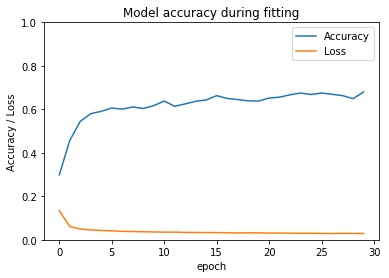

Creating dataset:   0%|          | 0/300 [00:00<?, ?it/s]

Creating dataset:   1%|          | 3/300 [00:00<00:11, 26.56it/s]

Creating dataset:   2%|▏         | 7/300 [00:00<00:10, 28.47it/s]

Creating dataset:   3%|▎         | 10/300 [00:00<00:10, 26.54it/s]

Creating dataset:   4%|▍         | 13/300 [00:00<00:10, 26.48it/s]

Creating dataset:   6%|▌         | 17/300 [00:00<00:10, 26.97it/s]

Creating dataset:   7%|▋         | 20/300 [00:00<00:14, 19.25it/s]

Creating dataset:   8%|▊         | 23/300 [00:01<00:13, 20.47it/s]

Creating dataset:   9%|▊         | 26/300 [00:01<00:12, 22.23it/s]

Creating dataset:  10%|▉         | 29/300 [00:01<00:11, 24.07it/s]

Creating dataset:  11%|█         | 33/300 [00:01<00:10, 26.01it/s]

Creating dataset:  12%|█▏        | 36/300 [00:01<00:10, 25.06it/s]

Creating dataset:  13%|█▎        | 40/300 [00:01<00:09, 26.38it/s]

Creating dataset:  14%|█▍        | 43/300 [00:01<00:10, 25.62it/s]

Creating dataset:  15%|█▌        | 46/300 [00:01<00:09, 26.31it/s]

Creating dataset:  17%|█▋        | 51/300 [00:01<00:08, 28.87it/s]

Creating dataset:  18%|█▊        | 55/300 [00:02<00:08, 30.01it/s]

Creating dataset:  20%|█▉        | 59/300 [00:02<00:09, 26.00it/s]

Creating dataset:  21%|██        | 62/300 [00:02<00:09, 25.24it/s]

Creating dataset:  22%|██▏       | 65/300 [00:02<00:09, 24.92it/s]

Creating dataset:  23%|██▎       | 69/300 [00:02<00:08, 26.48it/s]

Creating dataset:  24%|██▍       | 72/300 [00:02<00:10, 20.78it/s]

Creating dataset:  25%|██▌       | 75/300 [00:03<00:10, 21.52it/s]

Creating dataset:  26%|██▋       | 79/300 [00:03<00:09, 24.34it/s]

Creating dataset:  27%|██▋       | 82/300 [00:03<00:08, 25.16it/s]

Creating dataset:  29%|██▉       | 87/300 [00:03<00:07, 28.75it/s]

Creating dataset:  30%|███       | 91/300 [00:03<00:07, 29.66it/s]

Creating dataset:  32%|███▏      | 95/300 [00:09<01:34,  2.18it/s]

Creating dataset:  33%|███▎      | 99/300 [00:09<01:06,  3.04it/s]

Creating dataset:  34%|███▍      | 103/300 [00:09<00:46,  4.20it/s]

Creating dataset:  36%|███▌      | 108/300 [00:09<00:33,  5.76it/s]

Creating dataset:  38%|███▊      | 113/300 [00:09<00:24,  7.78it/s]

Creating dataset:  39%|███▉      | 118/300 [00:09<00:17, 10.32it/s]

Creating dataset:  41%|████      | 122/300 [00:09<00:13, 13.22it/s]

Creating dataset:  43%|████▎     | 128/300 [00:10<00:10, 17.09it/s]

Creating dataset:  44%|████▍     | 133/300 [00:10<00:07, 20.90it/s]

Creating dataset:  46%|████▋     | 139/300 [00:10<00:06, 25.71it/s]

Creating dataset:  48%|████▊     | 145/300 [00:10<00:05, 30.70it/s]

Creating dataset:  50%|█████     | 151/300 [00:10<00:04, 35.28it/s]

Creating dataset:  52%|█████▏    | 157/300 [00:10<00:03, 39.15it/s]

Creating dataset:  54%|█████▍    | 163/300 [00:10<00:04, 29.83it/s]

Creating dataset:  57%|█████▋    | 170/300 [00:11<00:03, 35.23it/s]

Creating dataset:  59%|█████▉    | 177/300 [00:11<00:03, 40.61it/s]

Creating dataset:  61%|██████    | 183/300 [00:11<00:02, 43.89it/s]

Creating dataset:  63%|██████▎   | 190/300 [00:11<00:02, 48.00it/s]

Creating dataset:  65%|██████▌   | 196/300 [00:11<00:02, 50.81it/s]

Creating dataset:  68%|██████▊   | 203/300 [00:11<00:01, 53.47it/s]

Creating dataset:  70%|███████   | 210/300 [00:11<00:01, 55.50it/s]

Creating dataset:  72%|███████▏  | 216/300 [00:11<00:01, 56.63it/s]

Creating dataset:  74%|███████▍  | 222/300 [00:11<00:01, 57.13it/s]

Creating dataset:  76%|███████▌  | 228/300 [00:12<00:01, 56.49it/s]

Creating dataset:  78%|███████▊  | 234/300 [00:12<00:01, 57.02it/s]

Creating dataset:  80%|████████  | 241/300 [00:12<00:00, 59.01it/s]

Creating dataset:  82%|████████▏ | 247/300 [00:12<00:01, 36.36it/s]

Creating dataset:  84%|████████▍ | 252/300 [00:12<00:01, 37.35it/s]

Creating dataset:  86%|████████▌ | 258/300 [00:12<00:01, 41.17it/s]

Creating dataset:  88%|████████▊ | 264/300 [00:12<00:00, 45.43it/s]

Creating dataset:  90%|█████████ | 270/300 [00:12<00:00, 48.74it/s]

Creating dataset:  92%|█████████▏| 276/300 [00:13<00:00, 48.01it/s]

Creating dataset:  94%|█████████▍| 282/300 [00:13<00:00, 49.44it/s]

Creating dataset:  96%|█████████▌| 288/300 [00:13<00:00, 51.26it/s]

Creating dataset:  98%|█████████▊| 294/300 [00:13<00:00, 51.94it/s]

Creating dataset: 100%|██████████| 300/300 [00:13<00:00, 53.41it/s]

***** Results on the test dataset *****

Loss: 0.031154844214518865 | Accuracy: 0.7366666674613953

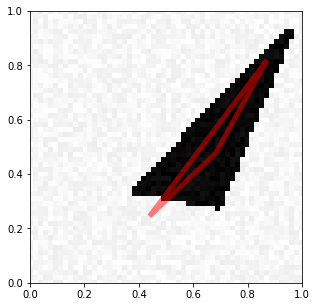

[[0.43969914 0.24503037 0.68304324 0.4773816  0.871541   0.8196501 ]]

In [6]:
%matplotlib inline
from mp1_test_set import *
from mp1_models import *
from mp1_dataset import *
import numpy as np

[X_train, Y_train] = generate_dataset_regression(1000, 10)
Y_train = normalize_output_reg3(Y_train)

model_reg, history_reg = regression_model2(X_train, Y_train, 'sgd', epochs=30, verbose=False, learning_rate=0.05)
plot_history(history_reg)

[X_test, Y_test] = generate_test_set_regression()
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
Y_test = normalize_output_reg3(Y_test)

print('***** Results on the test dataset *****')
evaluation = model_reg.evaluate(X_test, Y_test, verbose=False)
print('Loss: %s | Accuracy: %s' % (evaluation[0], evaluation[1]))

visualize_prediction(X_test[0], model_reg.predict(np.array([X_test[0]])))
print(model_reg.predict([[X_test[0]]]))


### 7. Image Denoising

For the denoising task, I tride to implement a light Autoencoder, by stacking 2 convolutions and 2 deconvolutions in the network. 

Unfortunately, my computer did not allow me to give to the model a huge amount of data, thus, I only gave to this network 50 training data. Though, it already gave me an accuracy of 0.8 on the training set (as shown below), and 0.9 on the test dataset.

Using TensorFlow backend.


Creating dataset:   0%|          | 0/50 [00:00<?, ?it/s]

Creating dataset:   8%|▊         | 4/50 [00:00<00:01, 36.72it/s]

Creating dataset:  12%|█▏        | 6/50 [00:00<00:01, 23.89it/s]

Creating dataset:  20%|██        | 10/50 [00:00<00:01, 25.71it/s]

Creating dataset:  26%|██▌       | 13/50 [00:00<00:01, 26.80it/s]

Creating dataset:  34%|███▍      | 17/50 [00:00<00:01, 28.18it/s]

Creating dataset:  42%|████▏     | 21/50 [00:00<00:00, 30.22it/s]

Creating dataset:  48%|████▊     | 24/50 [00:00<00:00, 29.98it/s]

Creating dataset:  56%|█████▌    | 28/50 [00:00<00:00, 31.50it/s]

Creating dataset:  64%|██████▍   | 32/50 [00:01<00:00, 31.65it/s]

Creating dataset:  72%|███████▏  | 36/50 [00:01<00:00, 26.36it/s]

Creating dataset:  80%|████████  | 40/50 [00:01<00:00, 28.68it/s]

Creating dataset:  88%|████████▊ | 44/50 [00:01<00:00, 30.76it/s]

Creating dataset:  96%|█████████▌| 48/50 [00:01<00:00, 31.57it/s]

Creating dataset: 100%|██████████| 50/50 [00:01<00:00, 29.90it/s]

Image size : 72 * 72

Output shape = (None, 63, 63, 6)

Output shape = (None, 54, 54, 16)

Output shape = (None, 63, 63, 8)

Output shape = (None, 72, 72, 1)

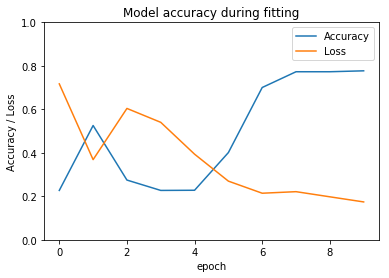

In [1]:
%matplotlib inline
from mp1_test_set import *
from mp1_dataset import *
from mp1_denoising import *
from mp1_model_plot import *
import numpy as np

dataset_size = 50

[X_train, Y_train] = generate_dataset_denoising(dataset_size, 20)

model_denois, history_denois = denoising_model(X_train, Y_train, 'sgd', epochs=10, verbose=False, learning_rate=0.01)
plot_history(history_denois)


In [3]:
[X_test, Y_test] = generate_test_set_denoising()
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)

evaluation = model_denois.evaluate(X_test, Y_test, verbose=False)
print('***** Results on the test dataset *****')
print('Loss: %s | Accuracy: %s' % (evaluation[0], evaluation[1]))


Creating dataset:   0%|          | 0/300 [00:00<?, ?it/s]

Creating dataset:   2%|▏         | 5/300 [00:00<00:06, 43.88it/s]

Creating dataset:   4%|▍         | 12/300 [00:00<00:05, 49.11it/s]

Creating dataset:   6%|▋         | 19/300 [00:00<00:05, 53.57it/s]

Creating dataset:   9%|▊         | 26/300 [00:00<00:04, 56.12it/s]

Creating dataset:  11%|█         | 33/300 [00:00<00:04, 58.77it/s]

Creating dataset:  14%|█▎        | 41/300 [00:00<00:04, 62.08it/s]

Creating dataset:  16%|█▌        | 47/300 [00:00<00:04, 55.80it/s]

Creating dataset:  18%|█▊        | 53/300 [00:00<00:04, 55.27it/s]

Creating dataset:  20%|██        | 61/300 [00:01<00:04, 58.78it/s]

Creating dataset:  23%|██▎       | 68/300 [00:01<00:03, 61.60it/s]

Creating dataset:  25%|██▌       | 76/300 [00:01<00:03, 64.42it/s]

Creating dataset:  28%|██▊       | 83/300 [00:01<00:03, 65.45it/s]

Creating dataset:  30%|███       | 90/300 [00:01<00:06, 31.52it/s]

Creating dataset:  33%|███▎      | 98/300 [00:01<00:05, 38.09it/s]

Creating dataset:  35%|███▌      | 106/300 [00:02<00:04, 44.44it/s]

Creating dataset:  38%|███▊      | 114/300 [00:02<00:03, 50.22it/s]

Creating dataset:  41%|████      | 122/300 [00:02<00:03, 55.48it/s]

Creating dataset:  43%|████▎     | 130/300 [00:02<00:02, 60.01it/s]

Creating dataset:  46%|████▌     | 138/300 [00:02<00:02, 63.19it/s]

Creating dataset:  49%|████▊     | 146/300 [00:02<00:03, 50.96it/s]

Creating dataset:  51%|█████▏    | 154/300 [00:02<00:02, 55.88it/s]

Creating dataset:  54%|█████▍    | 162/300 [00:02<00:02, 59.69it/s]

Creating dataset:  57%|█████▋    | 170/300 [00:03<00:02, 63.09it/s]

Creating dataset:  59%|█████▉    | 178/300 [00:03<00:01, 65.55it/s]

Creating dataset:  62%|██████▏   | 185/300 [00:03<00:01, 66.65it/s]

Creating dataset:  64%|██████▍   | 192/300 [00:03<00:01, 66.67it/s]

Creating dataset:  67%|██████▋   | 200/300 [00:03<00:01, 68.04it/s]

Creating dataset:  69%|██████▉   | 207/300 [00:03<00:01, 67.83it/s]

Creating dataset:  71%|███████▏  | 214/300 [00:03<00:01, 48.44it/s]

Creating dataset:  74%|███████▍  | 222/300 [00:03<00:01, 53.95it/s]

Creating dataset:  77%|███████▋  | 230/300 [00:04<00:01, 58.36it/s]

Creating dataset:  79%|███████▉  | 238/300 [00:04<00:01, 61.62it/s]

Creating dataset:  82%|████████▏ | 245/300 [00:04<00:00, 63.43it/s]

Creating dataset:  84%|████████▍ | 253/300 [00:04<00:00, 65.64it/s]

Creating dataset:  87%|████████▋ | 261/300 [00:04<00:00, 66.95it/s]

Creating dataset:  89%|████████▉ | 268/300 [00:04<00:00, 66.69it/s]

Creating dataset:  92%|█████████▏| 276/300 [00:04<00:00, 68.05it/s]

Creating dataset:  95%|█████████▍| 284/300 [00:04<00:00, 68.69it/s]

Creating dataset:  97%|█████████▋| 292/300 [00:04<00:00, 69.32it/s]

Creating dataset: 100%|█████████▉| 299/300 [00:05<00:00, 44.83it/s]

Creating dataset: 100%|██████████| 300/300 [00:05<00:00, 57.52it/s]

***** Results on the test dataset *****

Loss: 0.08810839623212814 | Accuracy: 0.9131134160359701

In the figure below is shown an exemple of the results obtained on the test dataset by the denoising network. Unfortunaltely, because of the few number of training data, the results are far from being great. But we already observe that the picture is quite averaged.

We can also observe edges effects, probably du to the convolutions, used wiith a 'valid' padding, which implies an asymetric treatment for the edges of the picture. And Finally, we see a 'blur' effect on the shape, which is classical on denoising tasks.

Text(0.5, 1.0, 'Predicted Images')

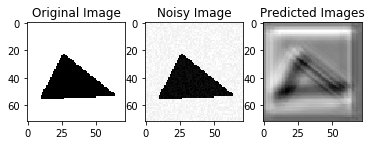

In [4]:
idx = 95
Y_pred = model_denois.predict(X_test[idx].reshape(1, 72, 72, 1))

plt.figure()
plt.subplot(131)
plt.imshow(Y_test[idx].reshape(72, 72), cmap='gray')
plt.title("Original Image")

plt.subplot(132)
plt.imshow(X_test[idx].reshape(72, 72), cmap='gray')
plt.title("Noisy Image")

plt.subplot(133)
plt.imshow(Y_pred.reshape(72, 72), cmap='gray')
plt.title("Predicted Images")
